# Stats and Public Health Part 1: Cleaning and EDA
### Daniel Mortensen
3-Aug-2021

## Introduction

Governments regularly track disease transimission in common animal carriers, such as rats and mosquitoes, in order to asses the risk of diseas outbreaks in human populations. One disease of concenr for the city of Chicago is the West Nile Virus (WNV), which is most commonly carried by mosquitoes. The Chicago city government has been collecting data on the transimission of WNV for more than a decade. Here, the data collected on WNV is analyzed in order to asses the quality of the data collection process as well as to provide information on which species of mosquito are most dangerous and which species are the most prevelant.

*Task Summary*
1. Asses the provided data in terms of size, formating, data types, and any duplicated or missing values.
5. Determine the relationship between month and mosquito activity / prevalence.
29. Determine which mosquito species is most likely to carry the WNV.
6. Determine which type of mosquito trap is the most effective.
80231. Determine how mosquito populations are changing with time.

*Results Summary*  
Overall, data collection efforts are excellent, though there is room for improvement. The dates are being recorded in a less than optimal format, some station data is not properly being recorded, and there are some duplicated data and missing data. However, sufficient data has been collected to determine that the species Culex Pipiens and Culex Restuans are both the most dangerous and most prevelant mosquito species in the area, and the population of Culex Restuans has been growing in recent years.

## Methods

Data were taken from the provided mosquito_data csv file, which contains tracking data for the years 2007 to 2019. All data were analyzed in this Jupyter Notebook, which is running on a Python 3 kernel.

The following libraries were imported for statistical analysis and data visualiztion under the given aliases:

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The mosquito_data csv file was imported as "mosquito_df":

In [55]:
mosquito_df = pd.read_csv('~/Unit 2/Stats and Public Health/mosquito_data.csv')

## Results and Discussion

#### *Assessment of the collected data*

The data is first assessed in terms of quantity by looking at the size of the data file provided and in terms of what data is actually collected.

In [56]:
print(f"The size of the data table is: {mosquito_df.shape}")
display(mosquito_df.head(3))

The size of the data table is: (18495, 13)


,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,NaN,NaN
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417


Extensive data has been collected, representing an impressive effort on the part of the data collection team. This team has collected approxiamatly 18,495 mosquito samples over the past 13 years, and during most collection events has collected 13 unique pieces of information. This information includes both numerical and categorical data. For clarity in what these destinctions mean, I will describe two numerical columns (`Year`, and `Mosquito number`) and two categorical columns (`Trap type` and `Species`). The `Year` column is a numerical column that stores the year in which the trap was checked, and values in this column range from from 2007 to 2019. The `Mosquito number` column is another example of a numerical column, and in this column, the number of mosquitoes found in each trap is recorded. Values in this column range from 1 to 50, with an average of 11 and a standard deviation of 13. Since the standard deviation is larger than the average and the average is less than one standard deviation from zero, we can likely conclude that the distribution of the `Mosquito number` column is neither symetric nor normal.  
  
The categorical columns also contain a lot of useful information. For example, the `Trap type` column details which type of trap was used. In total, there were four types of traps used, but the GRAVID trap type is the most common, accounting for 95% of all traps. The `Species` column is another categorical column, which describes which species of mosquito was found in each trap. There were four species of mosquito discovered in these measurements, with the Culex Testuans being the most common species, comprising nearly two thirds of the present mosquitoes.   
  
Information about the columns described here was assertained using the following script:

In [57]:
# These lines of code are queries used to explore the data distribtutions. 

print("Info about \"Year\" column")
print(mosquito_df["Year"].min())
print(mosquito_df["Year"].max())
print("\n")

print("Info about \"Mosquito number\" column:")
print(mosquito_df["Mosquito number"].describe())
print("\n")

print("Info about the \"Trap type\" and \"Species\" columns:")
print(mosquito_df[["Trap type", "Species"]].describe())
print("\n")

print(17741/18495*100)
print(11866/18495*100)

Info about "Year" column
2007
2019


Info about "Mosquito number" column:
count    18495.000000
mean        10.879913
std         13.475066
min          1.000000
25%          2.000000
50%          5.000000
75%         14.000000
max         50.000000
Name: Mosquito number, dtype: float64


Info about the "Trap type" and "Species" columns:
       Trap type         Species
count      18495           18495
unique         4               4
top       GRAVID  CULEX RESTUANS
freq       17741           11866


95.92322249256556
64.15788050824547


#### *Issues / Errors in the data*

It should be noted that the dates in this data, specifically the "Date" column, is not formatted optimaly. This issue is corrected here using the "to_datetime" function:

In [58]:
mosquito_df["Date"] = pd.to_datetime(mosquito_df["Date"])
display(mosquito_df.head(3))

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,NaN,NaN
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417


There are 658 duplicated rows as well, corresponding to 3.56 % of the total rows, as determined using the following script: 

In [59]:
count_duplicates = mosquito_df.duplicated(keep='first').sum()
percent_duplicates = round(mosquito_df.duplicated(keep='first').sum() / mosquito_df.shape[0] * 100, 2)
print(f"{count_duplicates} duplicated rows, {percent_duplicates} % of total rows")

658 duplicated rows, 3.56 % of total rows


Retaining duplicate rows will likely distort our analysis, so these duplicated data are removed using the following line of code:

In [60]:
mosquito_df = mosquito_df.drop_duplicates()

Lastly, there are several missing values from the data set. These missing values all correspond to longitude and latitude data for the various traps. 

In [68]:
# Checks each column for missing data
mosquito_df.isna().sum(axis=0)

Year               0
Week               0
Address Block      0
Block              0
Trap               0
Trap type          0
Date               0
Mosquito number    0
Mosquito ID        0
WNV Present        0
Species            0
Lat                0
Lon                0
dtype: int64

In [69]:
# To check for stations with missing data, I first made a dataframe containing only the Trap, Lat, and Lon
station_locations = mosquito_df[["Trap", "Lat", "Lon"]].drop_duplicates().sort_values("Trap")

# I then found the average location for each trap
station_locations = station_locations.groupby("Trap").mean()

# I then determined which traps had no associated longitude and latitude data.
missing_lat = station_locations['Lat'].isna().sum()
missing_lon = station_locations['Lon'].isna().sum()
print(f'{missing_lon} stations are missing longitude and latitude. That is {round(missing_lat / 190*100,1)} % of the stations.')

0 stations are missing longitude and latitude. That is 0.0 % of the stations.


There are 31 stations with no longitude or latitude. This number corresponds to 16.3 % of the stations, or in other words, 1 in 6 stations is one of these "missing stations." Removing all of the information associated with these missing stations would, thus, have a sever impact on our ability to draw conclusions from the provided data. Therefore, I replaced the missing values with the average longitude and latitude values from the other stations. Whil this will bias the results to some extent, it should not have a drastic impact on most of the conclusions drawn here. It is also likely that all of these missing stations are serviced by the same scientist or scientists and may be clustered in a region together.

In [70]:
# The missing longitude and latitude data were replaced by the averages of these values.
mosquito_df["Lat"] = mosquito_df["Lat"].fillna(mosquito_df["Lat"].mean())
mosquito_df["Lon"] = mosquito_df["Lon"].fillna(mosquito_df["Lon"].mean())

#### *Relationship between mosquito number and date*

In order to determine the relationship between the number of mosquitoes caught and the date, the number of mosquitoes caught was plotted as a function of month for each year in the data set in the figure below. The number of plots in this figure is dynamic an con auto update as data for additional years is added to the data set. For ease of comparying different years, the y-axes on these plots has all been scaled to the same maximum value.

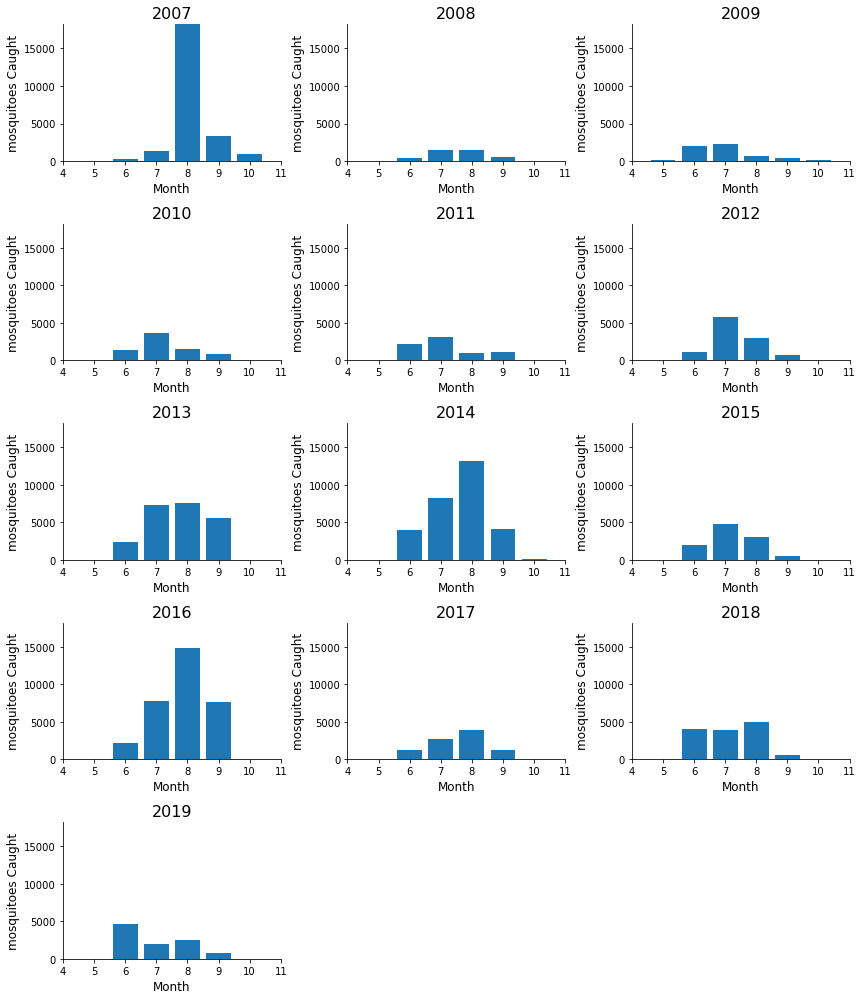

In [78]:
# These lines are used to determine the years being investigated
earliest_year = mosquito_df["Date"].dt.year.min()
last_year =  mosquito_df["Date"].dt.year.max() 
year_count = last_year - earliest_year + 1

# Here, the max value for the y-axes is determined
max = 0
for i in range(0, year_count):
    new_df = mosquito_df[["Date", "Mosquito number"]].where(mosquito_df["Year"] == (earliest_year + i)).dropna()
    summed_data = new_df.groupby(new_df["Date"].dt.month).sum()
    if summed_data["Mosquito number"].max() > max:
        max = summed_data["Mosquito number"].max()

# 'cols' and 'rows' here is the number of columns and rows in the subplots 
cols = 3
rows = int(year_count / cols + year_count % cols)
plt.subplots(year_count, figsize=(12,14))
for i in range(0, year_count):
    new_df = mosquito_df[["Date", "Mosquito number"]].where(mosquito_df["Year"] == (earliest_year + i)).dropna()
    summed_data = new_df.groupby(new_df["Date"].dt.month).sum()
    
    plt.subplot(rows, cols , i + 1)
    plt.bar(summed_data.index.values, summed_data["Mosquito number"])
    plt.xlabel("Month", size=12)
    plt.ylabel("mosquitoes Caught", size=12)
    plt.xlim([4,11])
    plt.ylim([0,max])
    plt.title(f"{earliest_year + i}", size = 16)
    
sns.despine()
plt.tight_layout()
plt.show()

Unsurprisingly, the number of mosquitoes caught is significantly higher in summer months, when the weather is warmer, than in other months. August and July are usually the heaviest months, with the exception of 2019, in which June was the ehaviest month. It is also interesting to note that in some years, significantly more mosquitoes were caught than in other years. For example, nearly 19,000 mosquitoes were caught in August of 2007, but fewer than 4,000 were caught in the entire year of 2008.

#### *Relationship between mosquito species and WNV prevalence*

The relationship between mosquito species and WNV prevalence is investigated by determining what percentage of each species was found to be infected with the WNV. As seen in the horizontal bar plot below, the species Culex Pipiens has the highest rate of infection, with 23.3% of captured mosquitoes carrying the virus. This is in stark contrast to the species Culex Territans, which only had a 1.5% infection rate. Clearly, infection rate depends strongly on species.

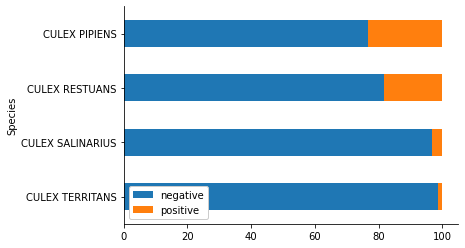

In [65]:
total_count = mosquito_df.groupby(["Species", "WNV Present"])["WNV Present"].count()
pct_infected = (total_count / mosquito_df.groupby(["Species"])["WNV Present"].count() * 100).unstack()

pct_infected.sort_values("positive").plot(kind="barh", stacked=True)
plt.legend(framealpha = 1, loc=3)
sns.despine()
plt.show()

#### *Relationship between the number of mosquitoes caught and trap type*

The effectiveness of different trap types at trapping mosquitoes was determined by calculating the average number of mosquitoes caught per trap. As can be seen in the figure below, the Sentinel trap type is the most effective, catching approxiamatly 25 mosquitoes on average per trap. Currently, Gravid traps are used in approxiamatly 95% of measurements. If financial concerns are not an issue, I strongly recomend to transitioning to the Sentinel traps for all measurements. The Ovi trap is far inferrior and should not be used.

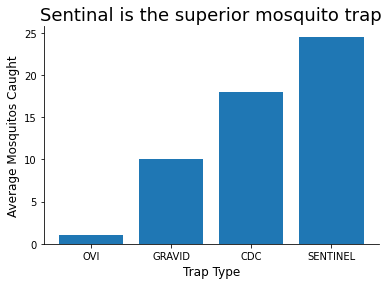

In [66]:
number_by_trap_df = mosquito_df[["Trap type", "Mosquito number"]].groupby("Trap type").mean()
number_by_trap_df = number_by_trap_df.sort_values("Mosquito number", ascending=True)

plt.figure()
plt.bar(number_by_trap_df.index.values, number_by_trap_df["Mosquito number"])
sns.despine()
plt.xlabel("Trap Type", size=12)
plt.ylabel("Average mosquitoes Caught", size=12)
plt.title("Sentinal is the superior mosquito trap", size=18)
plt.show()

#### *Changes in mosquito species population by year*

As was noted earlier, different species of mosquito have different WNV infections rates. It is therefore important to see which species are the most abundant and if this is changing year by year. In order to determine this, the number of each species of mosquito caught is plotted as a function of year in the figure below. The population of species Culex Restauns has been growing in the last several years but may be flattening out. Culex Pipiens is also frequently caught, depending on the year, possibly as a result of longterm climate patterns or possibly some local industrial practices. The other two species are not commonly caught. Unfortunatly, the most common species, Pipiens and Restuans, are also the highest carriers of the West Nile Virus.

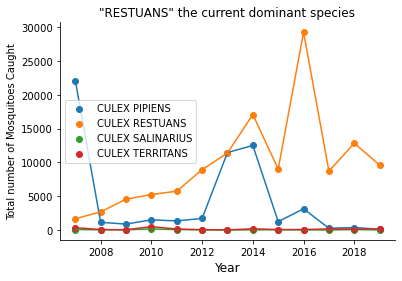

In [67]:
species_year_df = mosquito_df[["Year", "Species", "Mosquito number"]].groupby(["Year", "Species"]).sum()
species_year_df = species_year_df.unstack()

plt.figure()
plt.scatter(species_year_df.index.values, species_year_df["Mosquito number"]["CULEX PIPIENS"], label="CULEX PIPIENS")
plt.plot(species_year_df.index.values, species_year_df["Mosquito number"]["CULEX PIPIENS"])

plt.scatter(species_year_df.index.values, species_year_df["Mosquito number"]["CULEX RESTUANS"], label="CULEX RESTUANS")
plt.plot(species_year_df.index.values, species_year_df["Mosquito number"]["CULEX RESTUANS"])

plt.scatter(species_year_df.index.values, species_year_df["Mosquito number"]["CULEX SALINARIUS"], label="CULEX SALINARIUS")
plt.plot(species_year_df.index.values, species_year_df["Mosquito number"]["CULEX SALINARIUS"])

plt.scatter(species_year_df.index.values, species_year_df["Mosquito number"]["CULEX TERRITANS"], label="CULEX TERRITANS")
plt.plot(species_year_df.index.values, species_year_df["Mosquito number"]["CULEX TERRITANS"])

plt.legend()
plt.xlabel("Year", size=12)
plt.ylabel("Total number of Mosquitoes Caught")
plt.title("\"RESTUANS\" the current dominant species")

sns.despine()
plt.show()
